Import Libraries


In [16]:
import matplotlib.pyplot as plt
import random

All Functions

In [17]:
# y = mx + c
# create a dataset
# y + some random noise 


# to create a line and store the value of x and y coordinates
def create_original_dataset_from_a_line(slope: int, intercept: int, size_of_dataset: int, starting_val_of_x: int):
    dataset = []

    for x in range(starting_val_of_x, starting_val_of_x + size_of_dataset):
        y = (slope * x) + intercept
        dataset += [(x,y)]
        
    return dataset

# to add randomness to the original line to create a scattered dataset.
def create_scattered_dataset(dataset, percent_random_x: int, percent_random_y: int):
    scattered_dataset = []

    for (x,y) in dataset:
        scattered_dataset += [(generate_randomness(x, percent_random_x), generate_randomness(y, percent_random_y))]
        
    return scattered_dataset

# to add randomness to an integer 
def generate_randomness(current_val: int, percent_change: int):
    min_val: float = current_val - (percent_change / 100 * current_val)
    max_val: float = current_val + (percent_change / 100 * current_val)
    return pick_a_random_number(min_val, max_val)

# to pick a random number from a given range.
# Note: only display uptill 2 decimal places
def pick_a_random_number(min_val: float, max_val: float):
    random_number = round(random.uniform(min_val, max_val),2)
    return random_number

##### -------------------------------------------------------------------- #####

### linear regression functions
## using RSS in OLS

# ############################################################################ #
#         Σ(xi - x_mean)(yi - y_mean)                                          #
# beta1 = ---------------------------                                          #
#             Σ(xi - x_mean)^2                                                 #
# ############################################################################ #

# to find beta 1 
def find_beta1(dataset_x, dataset_y):

    x_mean = find_mean(dataset_x)
    y_mean = find_mean(dataset_y)  
    num = 0   
    den = 0
    
    for (x,y) in zip(dataset_x, dataset_y):
        num += (x - x_mean) * (y - y_mean)
        den += (x - x_mean)**2

    return num/den

# ############################################################################ #
# beta0 = = y_mean - (Beta1 * x_mean)                                          #
# ############################################################################ #

# to find beta 0
def find_beta0(dataset_x, dataset_y):

    x_mean = find_mean(dataset_x)
    y_mean = find_mean(dataset_y)   

    return y_mean - (find_beta1(dataset_x, dataset_y) * x_mean)

# to find mean of a one-dimensional array/list
def find_mean(dataset_1d):

    sum = 0

    for point in dataset_1d:
        sum += point

    return sum/len(dataset_1d)

## using AS
# NOTE: I am using AS because the residuals are asymmetric

# ############################################################################ #
# β₀ = median(y) - β₁ * median(x)                                              #
# ############################################################################ #

# ############################################################################ #
# β₁ = median((y - median(y)) * sign(x - median(x))) / median((x - median(x))^2)
# ############################################################################ #


## using gradient descent

# ############################################################################ #
# MSE = (1/n) * Σ(yi - ŷi)^2                                                   #
# ############################################################################ #

# ############################################################################ #
# d(MSE)/d(beta0) = -2/n * Σ[yi - beta0 - (beta1 * xi)]                        #
# ############################################################################ #

# ############################################################################ #
# d(MSE)/d(beta1) = -2/n * Σ[{yi - beta0 - (beta1 * xi)} * {xi}]               #
# ############################################################################ #

# to calculate the mean squared error
def CalMSE(beta0, beta1, dataset_x, dataset_y):
    sum = 0

    for (x,y) in zip(dataset_x, dataset_y):
        sum += (y - beta0 - (beta1 * x)) ** 2

    return (1/len(dataset_x)) * sum

# to find the partial derivative of beta 0
def findDerivativeOfBeta0(dataset_x, dataset_y, beta0, beta1):
    sum = 0

    for (x,y) in zip(dataset_x, dataset_y):
        sum += y - beta0 - (beta1 * x)

    return (-2/len(dataset_x)) * sum

# to find the partial derivative of beta 1
def findDerivativeOfBeta1(dataset_x, dataset_y, beta0, beta1):
    sum = 0

    for (x,y) in zip(dataset_x, dataset_y):
        sum += (y - beta0 - (beta1 * x)) * x

    return (-2/len(dataset_x)) * sum

# to find the new value of beta 0
def findNewBeta0(dataset_x, dataset_y, beta0: float = 0, beta1: float = 1, alphaOfBeta0: float = 0.001):
    return beta0 - (findDerivativeOfBeta0(dataset_x, dataset_y, beta0, beta1) * alphaOfBeta0)

# to find the new value of beta 1
def findNewBeta1(dataset_x, dataset_y, beta0: float = 0, beta1: float = 1, alphaOfBeta1: float = 0.001):
    return beta1 - (findDerivativeOfBeta1(dataset_x, dataset_y, beta0, beta1) * alphaOfBeta1)

# to find a list of y_hat values, using gradient descent, for every value of x
def findYcoordinatesFromGradientDescent(dataset_x, dataset_y, beta0, beta1, alphaOfBeta0, alphaOfBeta1, maxIter: int = 300):
    
    y_hat_list_GD = []

    counter = 0
    beta0 = 0
    beta1 = 1
    threshold = 1

    error = CalMSE(beta0, beta1, dataset_x, dataset_y)

    while error > threshold:
       beta0 = findNewBeta0(dataset_x, dataset_y, beta0, beta1, alphaOfBeta0)
       beta1 = findNewBeta1(dataset_x, dataset_y, beta0, beta1, alphaOfBeta1)
       error = CalMSE(beta0, beta1, dataset_x, dataset_y)
       counter += 1

       if (error < threshold or counter > maxIter):
            break
       
    for x in dataset_x:
        y_hat_list_GD.append(beta0 + (beta1 * x))
    
    print("In Gradient Descent:-")
    print("1. The mean squared error is: " + str(error))
    print("2. The final value of beta 0 is: " + str(beta0))
    print("3. The final value of beta 1 is: " + str(beta1))

    return y_hat_list_GD


# ## plot functions
# # scatter plot
# def scatter_plot(dataset, color: str = 'blue'):

#     x_scatter = []
#     y_scatter = []

#     for (x,y) in dataset:
#         x_scatter.append(x)
#         y_scatter.append(y)
        
#     plt.scatter(x_scatter, y_scatter, color = color)

# def line_plot(dataset_x, dataset_y, color: str = 'red'):
        
#     plt.plot(dataset_x, dataset_y, color = color)
    


Main code

In [18]:
## config of original dataset
slope_of_original_line = 40
intercept_of_original_line = 3
size_of_dataset = 100
starting_val_of_x = 1

# original dataset
original_dataset = create_original_dataset_from_a_line(slope_of_original_line, intercept_of_original_line, size_of_dataset, starting_val_of_x)
# print(original_dataset)

# scattered dataset
scattered_dataset = create_scattered_dataset(original_dataset, 2, 50)


In [19]:
### linear regression

x_list = []
y_list = []

# segregate the two-dimensional scattered_dataset into two 
# lists of x and y coordinates resp.
for (x,y) in scattered_dataset:
    x_list.append(x)
    y_list.append(y)

## using OLS

# y_hat = beta0 + (beta1 * x)
y_hat_list = []

# find a list of y_hat values, using OLS, for every value of x
for (x,y) in scattered_dataset:
    y_hat_list.append(find_beta0(x_list, y_list) + (find_beta1(x_list, y_list) * x))

## using gradient descent

# config of y_hat coordinated in gradient descent
initialBeta0forGradientDescent = 0
initialBeta1forGradientDescent = 1
alphaOfBeta0 = 0.000000005555555
alphaOfBeta1 = 0.000009
maxIter = 60000

# find a list of y_hat values, using gradient descent, for every value of x
y_hat_list_GD = findYcoordinatesFromGradientDescent(x_list, y_list, initialBeta0forGradientDescent, initialBeta1forGradientDescent, alphaOfBeta0, alphaOfBeta1, maxIter)


In Gradient Descent:-
1. The mean squared error is: 440295.28526714235
2. The final value of beta 0 is: -0.008128391824931035
3. The final value of beta 1 is: 42.433058293247086


Plots

As you can see the green line (GD) is almost superseeding the red line (OLS)


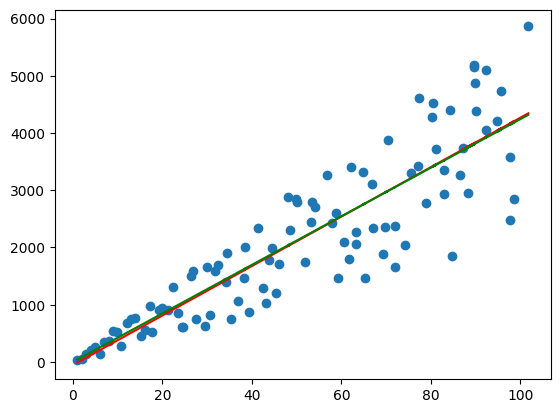

In [20]:
# mapping graphs

# plotting the scatter plot of randomized points
plt.scatter(x_list, y_list)

# obtaining the linear regression curve from OLS
plt.plot(x_list, y_hat_list, color = 'red')

# obtaining the linear regression curve from gradient descent
plt.plot(x_list, y_hat_list_GD, color = 'green')
print("As you can see the green line (GD) is almost superseeding the red line (OLS)")
# plt.show
